# Handson 06 - Matlab

## Amplitude Modulation
    
Por ser a maioria dos sinais em banda base sinais de baixa frequência, estes não podem ser transmitidos efetivamente via rádio (wireless). Modular sinais em banda base permite uma melhor distribuição das frequências sem que as transmissões interfiram na outra. Para isso cada sinal é modulado em frequências de portadoras diferentes dentro de uma faixa de banda.

Se tratando de modulação, trataremos os seguinte termos:
- **$m(t)$** : Sinal em banda base (Sinal modulante)
- **$W$**    : Banda do sinal em banda base (Sinal modulante)
- **$s(t)$ **: Sinal em banda passante (Sinal modulado)
- **$B$    **: Banda do sinal em banda passante (Sinal modulado)
- **$c(t)$ **: Sinal portadora
- **$f_{c}$**: Frequência da portadora

Existem três variáveis numa onda senoidal: amplitude, frequência (Instantânea) e fase. Um sinal mensagem pode ser usado para modular qualquer um desses parâmetros permitindo que $s(t)$ porte a informação do transmissor para o receptor.


Amplitude $A(t)$ é proporcional a $m(t)$ $\Leftrightarrow $ Amplitude modulation -AM

Frequência é proporcional a $m(t)$      $\Leftrightarrow $ Frequency modulation -FM

Fase é proporcional a $m(t)$         $\Leftrightarrow $ Phase modulation -PM

Antes de iniciar-mos o conteúdo e simulações, introduziremos o conceito da transformada de Hilbert.


### AM-DSB 

Quando se trata de Modulação AM a amplitude é quem caracteriza a informação a ser enviada, sendo a frequência e a fase constante. A equação que descreve a onda AM-DSB (double-sideband) é dada por:
$$S_{DSB}(t)=A_{c}\cdot[1+m_{a}\cdot cos(2 \pi  f_{m} t)]\cdot cos(2\pi f_{c}t);     $$       

Em que o índice de modulação $m_{a}$ é dado por:
$$m_{a}=\frac{A_{m}}{A_{c}}$$

Podemos expandir a equação da seguinte forma:
$$S_{DSB}(t)=A_{c}\cdot cos(2\pi f_{c}t)+m(t)\cdot cos(2\pi f_{c}t)$$

Então:
$$S_{DSB}(t)= c(t)+S_{SC}(t)$$

Em que $c(t)$ é a portadora e $S_{SC}$ é a Modulação AM suprimida da portadora (suppressed-carrier). Veremos mais detalhes no próximo tópico sobre esse tipo de modulação.

Para visualizar em frequência o sinal, faremos a transformada de fourrier de $c(t)$ (definido em $F_{c}$) e do sinal $S_{SC}$:

$$m(t)cos(2\pi f_{c}t)\Leftrightarrow \frac{1}{2}[M(f+f_{c})+M(f-f_{c})]$$

Sendo $M(f+f_{c})$ deslocamento para direita e $M(f-f_{c})$ deslocamento para esquerda. Nota-se a formação de banda USB(up side band) externo a $f_{c}$ e LSB(Low side band) interna a $f_{c}$ com faixa de frequência agora de $W=2f_{m}$. Caso a portadora tivesse uma frequência muito baixa tal que $f_{c}\leq W$, haveria a sobreposição dos espectros laterais um no outro tornando-se impossível recuperar a informação $m(t)$. Portanto é necessário que a frequência da portadora seja, no mínimo, $f_{c}\geq W$.
#### Sinal no tempo e frequência
Para exemplificar, no script a seguir será feita a modulação de um sinal em AM e em seguida sua visualização no tempo e na frequência.

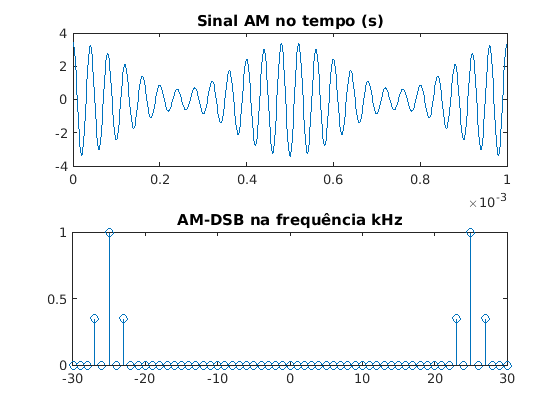

In [5]:
clc; clear all; close all;
%% Determinando os parâmetros da onda
Ac = 2;                                                         % Amplitude da portadora
Mu = 0.7;                                                       % Índice de modulação
fc = 25000;                                                     % Frequência da portadora Hz
fm = 2000;                                                      % Frequência do sinal Hz
t = [0:999]*1e-6;                                               % Definição do vetor tempo
s = Ac*(1+Mu*cos(2*pi*fm*t)).*cos(2*pi*fc*t);                   % Modulação AM      

%% Cálculo da FFT de AM-DSB
lfft=30;                                                        % Numero de elementos pontos da fft
k = [-lfft:lfft];                                               % Vetor da frequencia 
Nx = length(s);                                                 % Comprimento do vetor 'x'
Nk = length(k);                                                 % Comprimento do vetor 'k'
c = zeros(1,Nk);                                                % Define vetor da frequencia como um vetor zeros de comprimento k
Xk = fft(s)/Nx;                                                 % Normalizando a FFT

%% Colocando a fft em 30 pontos
  for i = 1:Nk-1,
    kk = k(i);
    if (kk >= 0),
      c(i) = Xk(kk+1);
    else
      c(i) = Xk(Nx+1+kk);  
    end;  
  end;  
  
%% Plotting
subplot(2,1,2)
stem(k,real(c))
title('AM-DSB na frequência kHz')
axis([-30 30 0 1])
subplot(2,1,1)
plot (t,s)
title('Sinal AM no tempo (s)')


Pode-se ver que houve a formção de $M(f+f_{c})$ e $M(f-f_{c})$ e também, adjacente a portadora, encontram-se a parcela USB (externa) e LSB (interna) como mencionado acima.

#### Recepção AM-DSB (detecção de envoltória) 
O circuito demodulador AM-DSB é composto por tres elementos 
![Figura01](./handsOn6_matlab_figs/EasyDEADemoduladorAM.png)


Neste circuito primeiramente é retificado o sinal com um diodo. Em seguida com um paralelo de capacitor e resistor ocorre a carga e descarga do capacitor conforme o sinal de entrada é maior ou não do que a carga atual do capacitor. 

Montaremos então um script que fará a modulação AM-DSB e em seguida sua demodulação. Faremos um laço com as condições de carga e descarga do capacitor e nele acrescentaremos o termo tau ($\tau $) como a constante de descarga do capacitor - resistor.

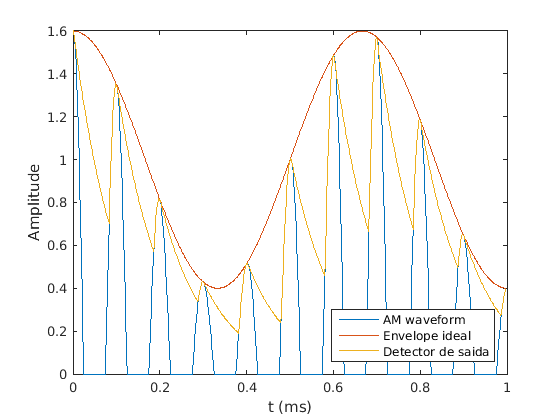

In [6]:
clc; clear all; close all;
%% Determinando os parâmetros da onda
t = [0:999]*1e-6;                                               % Definição do vetor tempo
Ts=1e-6;                                                        % Definiçao do periodo
fc = 10000;                                                     % Frequencia da portadora.
fm = 1500;                                                      % Frequencia do sinal
tau = 0.0001;                                                   % Constante de tempo do detector de envelope.
Mu = 0.6;                                                       % Indice de modulaçao.
x_AM = (1+Mu*cos(2*pi*fm*t)).*cos(2*pi*fc*t);                   % Onda Modulada AM-DSB


%% Calculando do envelope
% Envelope Ideal
x_env1 = abs(1+Mu*cos(2*pi*fm*t));
% Calcula a saída do detector de envelope.


 x_AM = x_AM.*(x_AM>0);                                         % Parte positiva da onda AM 
  x_env = zeros(size(x_AM));                                    % Cria um zeros vetor pra gurardar o envelope
  nSamp = length(x_AM);                                         % Número de amostras da onda AM
  out = -1;
 %% Cálculo da saida
 for i=1:nSamp,
    inp = x_AM(i);
    if (inp>=out)                                               % Caso 1: x_am(t) > Vc(t)
      out = inp;             
    else                                                        % Caso 2: x_am(t) < Vc(t)
      out = out*(1-Ts/tau);  
    end;
    x_env(i) = out;
  end; 

%% Plotting
plot(1000*t,x_AM,1000*t,x_env1,1000*t,x_env);
ylabel('Amplitude');
xlabel('t (ms)');

legend('AM waveform','Envelope ideal','Detector de saida','location','southeast');

Esse tipo de modulação é recomendado em sistemas de difusão, em que há um grande número de receptores em relação ao de transmissores, é mais econômico um transmissor caro de alta potência e receptores baratos, para que haja maior difusão.

### AM-DSB-SC 
#### Sinal no tempo e frequência
O sinal AM-DSB-SC consiste em suprimir a portadora da AM-DSB, deixando o sinal unicamente proporcional à mensagem, em outras palavras, quando não houver sinal $m(t)$ não haverá sinal enviado. 
Faremos neste script a modulação de um sinal AM-DSB-SC ($m(t)\cdot cos(2\pi f_{c}t)$). Será possível ver que haverá uma queda na frequência da portadora $f_{c}$ como prevíamos.

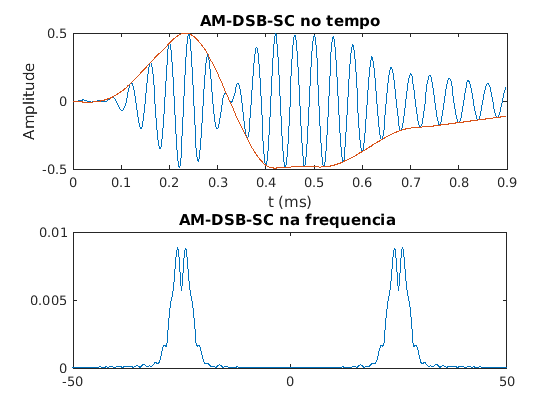

In [4]:
clc; clear all; close all;
%% Parâmetros do sinal mensagem e portadora 
load('handsOn6_matlab_codes/am_demo1.mat')
ts=t(2)-t(1);                       % Calcula o período de amostragem T=t(i)-t(i-1)
fs=1/ts;                            % Frequência de amostragem
s= carrier.*msg;                    % Sinal AM-DSB-SC (portadora com amplitude 1)
%% Cálculo da FFT
lfft=length(s)*10;                  % Comprimento da fft (Arbitrário)
freq=(-fs/2:fs/lfft:fs/2-fs/lfft); % Definindo o eixo da frequencia para a DSB no domínio da frequência
Mfft=fft(s,lfft)/lfft;              % Calcula a FFT
M_sig=fftshift(Mfft);               % Posiciona a FFT
%% Plotting
% Plotando a AM-DSB-SC e a mensagem na frequencia
subplot(2,1,1)
plot (t,s,t,msg)
title('AM-DSB-SC no tempo')
ylabel('Amplitude');
xlabel('t (ms)');
% Plotando a AM-DSB-SC e a mensagem na frequencia 
subplot(2,1,2)
plot (freq ,abs(M_sig))             
title('AM-DSB-SC na frequencia ')
axis([-50 50 0 0.01])
    

#### Recepção AM-DSB-SC (detecção coerente) 
Demodular um sinal AM-DSB-SC em termos de código é extremamente simples, visto que basta devolver a portadora ao sinal enviado multiplicando os dois e em seguida um filtro passa-baixa que teremos o sinal $m(t)$.

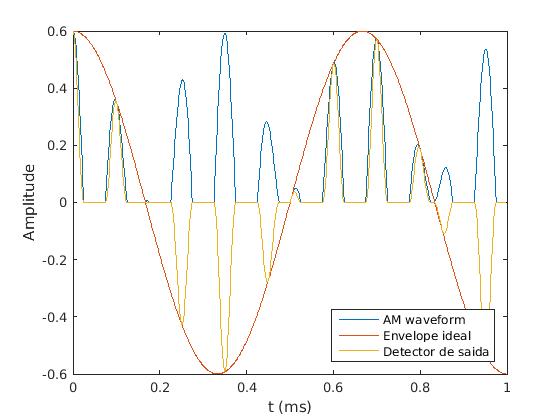

In [1]:
clc; clear all; close all;
%% Determinando os parâmetros da onda
t = [0:999]*1e-6;                                               % Definição do vetor tempo
Ts=1e-6;                                                        % Definiçao do periodo
fc = 10000;                                                     % Frequencia da portadora.
fm = 1500;                                                      % Frequencia do sinal
tau = 0.00003;                                                  % Constante de tempo do detector de envelope.
Mu = 0.6;                                                       % Indice de modulaçao.
x_AM = Mu*cos(2*pi*fm*t).*cos(2*pi*fc*t);                       % Onda Modulada AM-DSB-SC

%% Calculando do envelope
% Envelope Ideal
x_env1 =Mu*cos(2*pi*fm*t);
% Calcula a saída do detector de envelope.
x_AM = x_AM.*(x_AM>0);                                         % Parte positiva da onda AM 
x_env = zeros(size(x_AM));                                     % Cria um zeros vetor pra gurardar o envelope

 %% Cálculo da saida
x_env=x_AM.*cos(2*pi*fc*t);

%% Plotting
plot(1000*t,x_AM,1000*t,x_env1,1000*t,x_env);
ylabel('Amplitude');
xlabel('t (ms)');
legend('AM waveform','Envelope ideal','Detector de saida','location','southeast');

Porém em termos práticos há um custo muito elevado de se gerar um sinal da portadora em fase com o sinal recebido, não sendo apropriado para sistemas de difusão e sim para transmissão ponto a ponto (mesmo numero de transmissores e receptores). 

### AM-SSB  
#### Sinal no tempo e frequência 

Na modulação AM formam-se duas bandas laterais, como já comentado anteriormente, as quais as duas possuem a informação completa do sinal $m(t)$. Em consequência, para um sinal em banda base, a modulação AM-DSB requer o dobro de largura de banda necessário para a transmissão. Para melhorar a eficiência espectral de banda, bem como a de potência de transmissão, basta transmitir uma delas e filtrando a outra, resultando num novo tipo de transmissão AM-SSB. Além disso podemos remover a portadora do sinal, resultando n AM-DSB-SC. A demodulação do sinal AM-SSB-SC é exatamente a mesma de um sinal AM-DSB-SC. A grande vantagem da AM-SSB-SC está na economia de até 83% da potência de transmissão e em contra partida precisa-se de osciladores tão precisos quanto os da AM-DSB-SC.

No script abaixo é exemplificado o processo de modulação e demodulação da AM-SSB. Inicialmente modula-se a onda AM em DSB-SC e em seguida é feita a filtragem de frequências superiores (LSB) ou inferiores (USB) da onda DSB, formando AM-SSB.

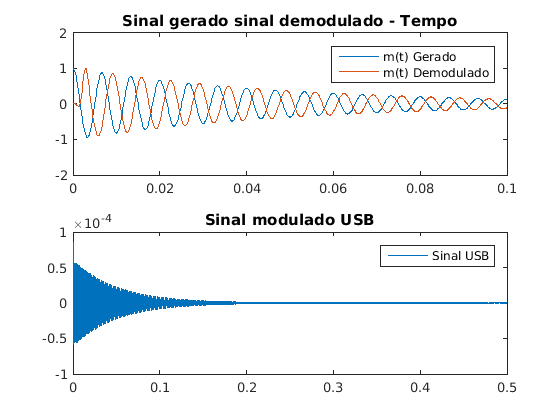

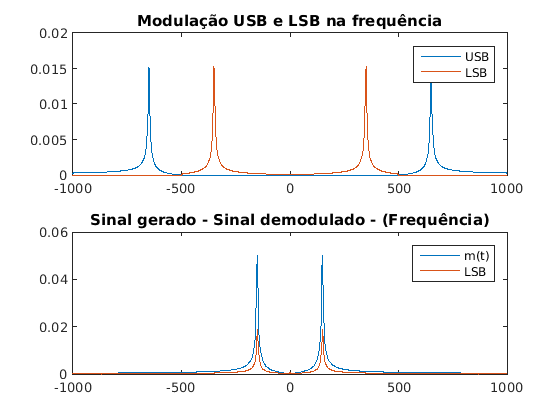

In [1]:
clc; clear all; close all;
%% Determinando os parâmetros da onda
Ts=1e-4;                                                    % Período de amostragem
fs=1/Ts;                                                    % Frequencia de amostragem
t = [0:5e3]*Ts;                                             % Definição do vetor tempo
fc = 500;                                                   % Frequencia da portadora.
fm = 150;                                                   % Frequencia do sinal
Am=1;                                                       % Amplitude do sinal senoidal
Ac=1;                                                       % Amplitude da portadora
Mu = Am/Ac;                                                 % Indice de modulaçao.
carrier = Ac*cos(2*pi*fc*t);                                % Sinal portadora
m_t = Am*cos(2*pi*fm*t).*exp(-t*20);                        % Sinal mensagem
lmt = length(m_t);                                          % Comprimento do vetor mensagem
M_t = fftshift(fft(m_t,lmt)/lmt);                           % Sinal na frequência
freq_m = (-fs/2:fs/lmt:fs/2-fs/lmt);                        % Eixo da frequência para M_t
%% Modulação SSB
% Modulação DSB-SC
x_AM = m_t.*carrier;                                        % Onda Modulada DSB-SC no tempo
lfft = length(x_AM);                                        % Comprimento do sinal DSB-SC
lfft = 2^ceil(log2(lfft));                                  % Comprimento do sinal DSB-SC potência de dois ex(1001 --> 1024)
X_AM = fftshift(fft(x_AM,lfft)/lfft);                       % Onda Modulada AM-DSB-SC na Frequência
freq = (-fs/2:fs/lfft:fs/2-fs/lfft);                        % Eixo da frequência 
L_lsb = floor(fc*Ts*lfft);                                  % Local na frequência que se encontra a LSB.

% Filtragem da LSB
Filt_LSB = ones(1,lfft);                                    % Vetor filtro LSB (degrau) na frequencia 
Filt_LSB(lfft/2-L_lsb+1:lfft/2+L_lsb) = zeros(1,2*L_lsb);   % Definindo zeros na LSB
X_SSB_USB = X_AM.*Filt_LSB;                                 % Filtrando a frequência LSB

% Filtragem da USB
Filt_USB = zeros(1,lfft);                                   % Vetor filtro USB na frequencia
Filt_USB(lfft/2-L_lsb+1:lfft/2+L_lsb) = ones(1,2*L_lsb);    % Onde tinha 1 agora tem 0
X_SSB_LSB = X_AM.*Filt_USB;                                 % Filtrando a frequencia USB

%% Visualização SSB no tempo
% USB tempo
s_ssb_USB = real(ifft(fftshift(X_SSB_USB)));                % Inversa de fourrier
s_ssb_USB = s_ssb_USB (1:lmt);                              % Ajustando o comprimento do vetor

% LSB tempo
s_ssb_LSB = real(ifft(fftshift(X_SSB_LSB)));                % Inversa de fourrier
s_ssb_LSB = s_ssb_LSB (1:lmt);                              % Ajustando o comprimento do vetor

%% Demodulação
% Demodulação SSB-USB
s_dem_USB= s_ssb_USB.*carrier*2;                            % Multiplicação com a portadora em fase
B_m=1000;                                                   % Banda para filtragem 
h=fir1(50,[B_m*Ts]);                                        % Janelamento Hamming da banda
s_rec_USB=filter(h,1e-4,s_dem_USB);                         % Sinal filtrado

lfft=length(s_rec_USB);                                     % Comprimento do sinal recuperado
lfft=2^ceil(log2(lfft));                                    % Transformando para uma potencia de 2
SSB_freq_USB = fftshift(fft(s_rec_USB,lfft)/lfft);          % Sinal recuperado na frequencia
s_rec_USB = (max(m_t)/max(s_rec_USB))*s_rec_USB;            % Amplificando o sinal

% Demodulação SSB-LSB
s_dem_LSB= s_ssb_LSB.*carrier*2;                            % Multiplicação com a portadora em fase
B_m=1000;                                                   % Banda para filtragem 
h=fir1(50,[B_m*Ts]);                                        % Janelamento Hamming da banda
s_rec_LSB=filter(h,1e-4,s_dem_LSB);                         % Sinal filtrado

lfft=length(s_rec_LSB);                                     % Comprimento do sinal recuperado
lfft=2^ceil(log2(lfft));                                    % Transformando para uma potencia de 2
SSB_freq_LSB = fftshift(fft(s_rec_LSB,lfft)/lfft);          % Sinal recuperado na frequencia
s_rec_LSB = (max(m_t)/max(s_rec_LSB))*s_rec_LSB;            % Amplificando o sinal

%% Plotting
% Sinal na frequência 
subplot(2,1,1)
plot(freq,abs(X_SSB_USB),freq,abs(X_SSB_LSB))
legend('USB','LSB');
title ('Modulação USB e LSB na frequência')
axis([-1e3 1e3 0 0.02])

subplot(2,1,2)
plot(freq_m,abs(M_t),freq, abs(SSB_freq_USB))
title('Sinal gerado - Sinal demodulado - (Frequência)')
legend('m(t)','LSB');
axis([-1e3 1e3 0 0.06])
figure()
% Sinal no tempo
subplot(2,1,1)
plot(t,m_t,t,s_rec_USB)
axis([0 0.1 -2 2]);
title('Sinal gerado sinal demodulado - Tempo')
legend('m(t) Gerado','m(t) Demodulado');

subplot(2,1,2)
plot(t,s_ssb_USB)
title('Sinal modulado USB')
legend('Sinal USB');

### QAM 
#### Sinal no tempo e frequência:
Gerar uma onda AM-DSB-Sc torna-se complicado a medida que necessita-se de filtros (passa baixa ou passa alta) de extrema precisão para que este elimine a frequência, por exemplo, LSB totalmente sem prejudicar na frequência USB. Por isso o uso de modulação em amplitude em quadratura (QAM) torna-se uma solução viável, sendo gerada com exatidão sem exigência de filtros extremamente precisos.

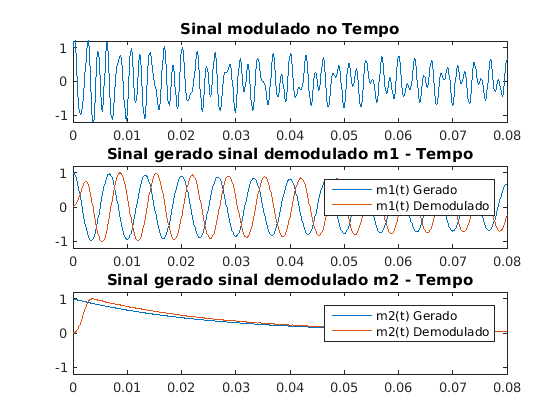

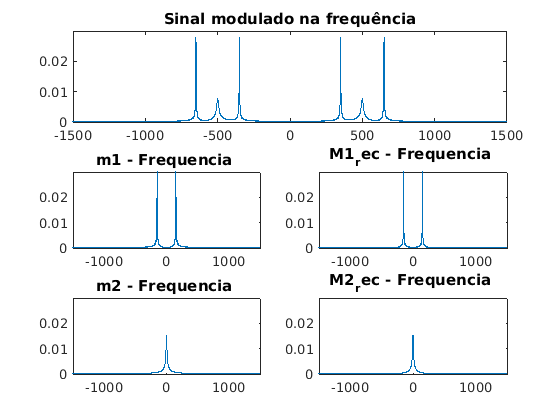

In [3]:
clc; clear all; close all;
%% Determinando os parâmetros da onda
Ts=1e-4;                                                    % Período de amostragem
fs=1/Ts;                                                    % Frequencia de amostragem
t = [0:5e3]*Ts;                                             % Definição do vetor tempo
fc = 500;                                                   % Frequencia da portadora.
fm = 150;                                                   % Frequencia do sinal
Am=1;                                                       % Amplitude do sinal senoidal
Ac=1;                                                       % Amplitude da portadora
Mu = Am/Ac;                                                 % Indice de modulaçao.
carrierc = Ac*cos(2*pi*fc*t);                               % Sinal portadora cosseno
carriers = Ac*sin(2*pi*fc*t);                               % Sinal portadora seno
m1_t = Am*cos(2*pi*fm*t).*exp(-t*5);                        % Sinal mensagem
m2_t = Am*exp(-t*40);                                       % Sinal mensagem
B_m=150;                                                    % Banda para filtragem 
h=fir1(40,[B_m*Ts]);                                        % Janelamento Hamming da banda
lfft = length(t);                                           % FFT com o mesmo comprimento do sinal (t , m1_t e m2_t)
lfft = 2^ceil(log2(lfft)+1);                                % Comprimento da FFT em potência de 2
freqm = (-fs/2:fs/lfft:fs/2-fs/lfft);                       % Eixo da frequência 
M1 = fftshift(fft(m1_t,lfft)/lfft);                         % Sinal m1_t na frequência
M2 = fftshift(fft(m2_t,lfft)/lfft);                         % Sinal m2_t na frequência
%% Modulação QAM
% Modulação - Soma de duas DSB-SC ortogonais
x_qam = (m1_t).*(carrierc)+(m2_t).*(carriers);              % Sinal QAM no tempo
% Sinal na frequência 
lfft = length(t);                                           % FFT com o mesmo comprimento do sinal (t , m1_t e m2_t)
lfft = 2^ceil(log2(lfft)+1);                                % Comprimento da FFT em potência de 2
X_QAM=fftshift(fft(x_qam,lfft)/lfft);                       % Sinal QAM na frequência
freqm = (-fs/2:fs/lfft:fs/2-fs/lfft);                       % Eixo da frequência 

%% Demodulação
% Separando sinais
m1_dem = x_qam.*cos(2*pi*fc*t)*2;                           % Demodulando m1_t
m2_dem = x_qam.*sin(2*pi*fc*t)*2;                           % Demodulando m2_t
M1_dem = fftshift(fft(m1_dem,lfft)/lfft);                   % m1_t na frequência com portadora
M2_dem = fftshift(fft(m2_dem,lfft)/lfft);                   % m2_t na frequência com portadora

% Filtro passa baixa
m1_rec=filter(h,1,m1_dem);                                  % Filtrando m1_dem em Hamming
M1_rec=fftshift(fft(m1_rec,lfft)/lfft);                     % Calculando o sinal recebido m1_rec na frequência
m2_rec=filter(h,1,m2_dem);                                  % Filtrando m2_dem em Hamming
M2_rec=fftshift(fft(m2_rec,lfft)/lfft);                     % Calculando o sinal recebido m2_rec na frequência
m1_rec = (max(m1_t)/max(m1_rec))*m1_rec;                    % Amplificando o sinal m1_rec
m2_rec = (max(m1_t)/max(m2_rec))*m2_rec;                    % Amplificando o sinal m2_rec

%% Plotting
% Sinal m1_t e m2_t na frequência
subplot(3,2,[1,2])
plot(freqm,abs(X_QAM))
title('Sinal modulado na frequência')
axis([-1500 1500 0 0.03 ])

subplot(3,2,3)
plot(freqm,abs(M1))
title('m1 - Frequencia ')
axis([-1500 1500 0 0.03 ])

subplot(3,2,4)
plot(freqm,abs(M1_rec))
title('M1_rec - Frequencia ')
axis([-1500 1500 0 0.03 ])

subplot(3,2,5)
plot(freqm,abs(M2))
title('m2 - Frequencia ')
axis([-1500 1500 0 0.03 ])

subplot(3,2,6)
plot(freqm,abs(M2_rec))
title('M2_rec - Frequencia ')
axis([-1500 1500 0 0.03 ])

figure()
% Sinal m1_t e m2_t no tempo
subplot(3,1,1)
plot (t,x_qam)    
title('Sinal modulado no Tempo')
axis([0 0.08 -1.2 1.2 ])

subplot(3,1,2)
plot (t,m1_t,t,m1_rec)    
title('Sinal gerado sinal demodulado m1 - Tempo')
legend('m1(t) Gerado','m1(t) Demodulado');
axis([0 0.08 -1.2 1.2 ])

subplot(3,1,3)
plot (t,m2_t,t,m2_rec)    
title('Sinal gerado sinal demodulado m2 - Tempo')
legend('m2(t) Gerado','m2(t) Demodulado');
axis([0 0.08 -1.2 1.2 ])

## Frequence Modulation
Sinais FM variam sua frequência instantânea linearmente com o sinal $m(t)$ de froma que:

$$ f_{i}(t)=f_{c}+K_{f}m(t)$$

Onde $k_{f} $ é a sensibilidade de frequência do sinal e $f_{i}(t)$ é a frequência instantânea. Logo, podemos expressar uma onda FM da seguinte forma:

$$ S_{FM}(t) = A_{c}\cdot cos[\omega_{c}\cdot t +2\pi k_{f} \int_{0}^{t}m(\tau)\cdot d\tau ]$$

Sendo a amplitude constante, podemos calcular a potência do sinal como:

$$P_{med}= \frac{A^2}{2} $$

Em FM, nenhuma das propriedades da transformada de Fourrier podem ser aplicadas. Para determinar a banda de frequência a partir da equação de frequência instantânea definiremos: 

$$ f_{i}(t)=f_{c}+\Delta f\cdot cos(2\pi f_{m}t)$$

Sendo $\Delta f = K_{f}A_{m}$ o desvio de frequência.

As vantagens de usar FM tornam-se visível quanto a melhor descriminação de ruido devido a sua amplitude constante (ruido menos prejudicial) alem de que como é modulado em altas frequências (veremos o porquê adiante), é necessário dimensões menores de antenas. Em contrapartida a modulação FM requer maior largura de banda em relação a modulação AM além de uma maior complexidade no receptor e no emissor.

A informação contida em sinais FM reside na frequência instantânea deste de forma que:


<img src = "./handsOn6_matlab_figs/s_t.png " width="700" height="200">

Sendo 
$$V(t)=\frac{dS(t)}{dt}$$
Desenvolvendo a equação acima temos que:

$$ V(t)= A_{c}[2 \pi f_{c} + 2 \pi k_{f} m(t) ] \cdot sen[2 \pi f_{c} t+ 2 \pi k_{f} \int_{0}^{t}m(\tau)d\tau]    $$
sendo:
$$ V_{AM}(t)=  A_{c}[2 \pi f_{c} + 2 \pi k_{f} m(t) ]  $$
$$ V_{FM}(t)=  sen[2 \pi f_{c} t+ 2 \pi k_{f} \int_{0}^{t}m(\tau)d\tau] $$


E então, com um circuito diferenciador, transformamos nosso sinal FM em um sinal AM, então podemos demodular o sinal de saida com o mesmo circuito de um AM-DSB recupera-se a mensagem $m(t)$.

Neste experimento faremos a demodulação com um diferenciador ideal. Para essa simulação de FM, faremos uso da função 'diff' que retorna a diferença entre os pontos adjacentes do vetor análoga a derivada em tempo contínuo. Por exemplo, seja um sinal $x$ no tempo dado por:

In [8]:
t=0:1:10;
x=5*t+2;
dx = diff(x)


dx =

     5     5     5     5     5     5     5     5     5     5



Perceba que se o vetor x tem N componentes o vetor dx terá N-1. Isso ocorre porque a função diff retorna [x(i+1)-x(i)] para todos os elementos, resultando então em N-1 elementos.
No script abaixo faremos a repetição do elemento s_fm(1) para que quando usemos a função diff tenhamos um vetor com o mesmo número de elementos.

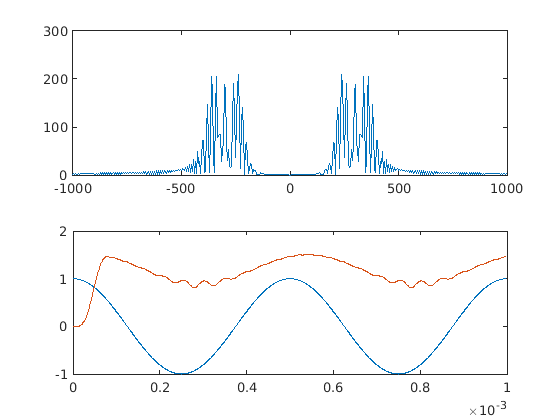

In [11]:
clc; clear all; close all;
%% Determinando os parâmetros da onda
t = [0:999]*1e-6;                                               % Definição do vetor tempo
ts=1e-4;                                                        % Definiçao do periodo de amostragem
lfft=length(t);                                                 % Comprimento do vetor t
lfft=2^ceil(log2(lfft));                                        % Transforma o comprimento em potência de 2
m_sig=cos(2*pi*2000*t);                                         % Sinal no tempo
M_freq =fftshift(fft(m_sig,lfft));                              % Sinal na frequência
freqm=(-lfft/2:lfft/2-1)/(lfft*ts);                             % Eixo da frequência
B_m=100;                                                        % largura de banda 100 lateral
h=fir1(80,[B_m*ts]);                                            % Janelamento Hamming

%% Modulação
% Montando o sinal FM no tempo
kf=160*pi;                                                      % Sensibilidade de frequencia 
m_intg=kf*ts*cumsum(m_sig);                                     % Sinal mensagem com Kf
s_fm=cos(2*pi*30000*t+m_intg);                                  % Sinal portadora com m(t)
% Visualizando o sinal na freuqência
lfft=length(t);                                                 % Compriemnto da FFT
lfft=2^ceil(log2(lfft)+1);                                      % Lfft na potencia mais proxima de 2
S_fm=fftshift(fft(s_fm,lfft));                                  % FFT do sinal
freq=(-lfft/2:lfft/2-1)/(lfft*ts);                              % Eixo da frequência

%% Demodulação

s_fmdem=diff([s_fm(1) s_fm])/(ts*kf);                           % Diferenciador repetindo o primeiro elemento 
s_fmrec=s_fmdem.*(s_fmdem>0);                                   % Parte positiva do sinal 
s_dec=filter(h,1,s_fmrec);                                      % Filtro passa baixa em 200Hz de banda

%% Plotting 
subplot(2, 1, 1)
plot(freq,abs(S_fm))
axis([-1000 1000 0 300])

subplot(2 ,1, 2)
plot(t,m_sig,t,s_dec)

O resultado da demodulação FM mostra-se distorcido primeiramente com atrasos e em baixas amplitudes ocorre maior distorção. Isso ocorre porque quando o sinal da mensagem é negativo a frequência instantânea é baixa, causando mais distorções. Esse efeito é despresível quando se trata de frequências altas como na ordem de $10^{6}$Hz sendo assim possível a transmissão FM apenas em alta frequência.

### Transformada de Hilbert
O conceito de amplitude/fase/freqüência instantânea é fundamental para a comunicação de informações e aparece em muitas aplicações em processamento de sinais. Sabemos que um sinal da forma $$ x(t) = Am \cdot cos (\omega t + \phi)$$ Não carrega consigo nenhuma informação. Para que isso ocorra, é necessário que o sinal seja modulado. 

Seja x(t) um sinal modulado qualquer (Fm, Pm, Am ...):
$$x(t)= a(t) \cdot cos(\phi(t))$$
Entende-se $a(t)$ como amplitude instantânea do sinal e $\phi (t)$ como sua frequência. Podemos calcular também a frequência angular instantânea como:
$$ f(t) = \frac {1} {2 \pi } \frac {d \phi (t)}{dt} $$

Então seja um sinal real $x(t)$ qualquer, podemos extrair a informação $m(t)$ dele aplicando a transformada de Hilbert no sinal recebido tanto para modulação em ângulo quanto para a modulação em amplitude. Aplicando a transformada de Hilbert podemos calcular facilmente o sinal $m(t)$ no plano complexo.
![Figura01](./handsOn6_matlab_figs/Hilbert_Transform.png)

 Sendo 
 
 $$ Z(t)= Z_{r}(t)+j Z_{im}(t) = x(t) + j H[x(t)]$$
 
 Em que H[x(t)] representa a transformada de Hilbert em x(t).
 

- Para a informação em ângulo:

$$ \phi (t) = \angle Z(t) = arctan(\frac{Z_{im}(t)}{Z_{r}(t)})$$

- Para a informação em amplitude:

$$ a(t) = \left |Z(t)  \right | = \sqrt{Z_{im}^{2}(t)+Z_{r}^{2}(t)}$$
No script abaixo foi feito a simulação em AM-DSB usando a tranformada de Hilbert para decompor completamente um sinal $m(t)$.

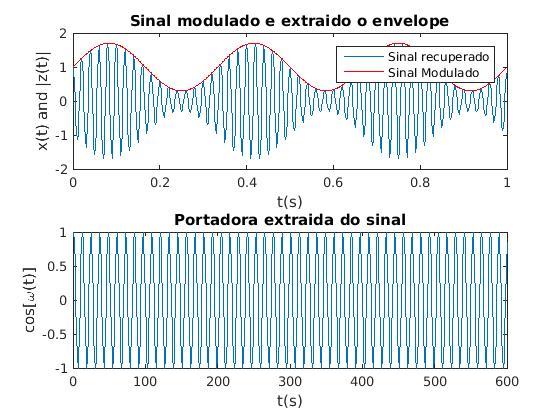

In [5]:
clc; clear all; close all;
%% Parâmetros da onda
fs = 600;                                           % Frequencia de amostragem 
t = 0:1/fs:1-1/fs;                                  % Eixo do tempo
m_t = 1+0.7 * sin(2*pi*3*t) ;                       % Sinal m(t)
c_t =cos(2*pi*50*t);                                % Sinal portadora
s_t = m_t .* c_t;                                   % Sinal Modulado em AM-DSB-SC

%% Calcula a transformada de Hilbert 
z = hilbert(s_t);                                   % Forma analítica (real + imaginario)
inst_amplitude = abs(z);                            % Amplitude instantânea
inst_phase = angle(z);                              % Fase instantânea
inst_freq = diff(inst_phase)/(2*pi)*fs;             % Frequência instantânea                                            
regenerated_carrier = cos(inst_phase);              % Regenerando a portadora 

%% Plotting
% Plota o sinal AM e detector de envelope
subplot(2,1,1); 
plot(t,s_t);
hold on;
plot(t,inst_amplitude,'r');                           
title('Sinal modulado e extraido o envelope');
legend('Sinal recuperado','Sinal Modulado');
xlabel('t(s)'); 
ylabel('x(t) and |z(t)|');
% Plota portadora recuperada
subplot(2,1,2); 
plot(cos(inst_phase));
title('Portadora extraida do sinal'); 
xlabel('t(s)'); 
ylabel('cos[\omega(t)]');

No script abaixo foi feito a simulação em FM usando a tranformada de Hilbert para decompor completamente um sinal $m(t)$.

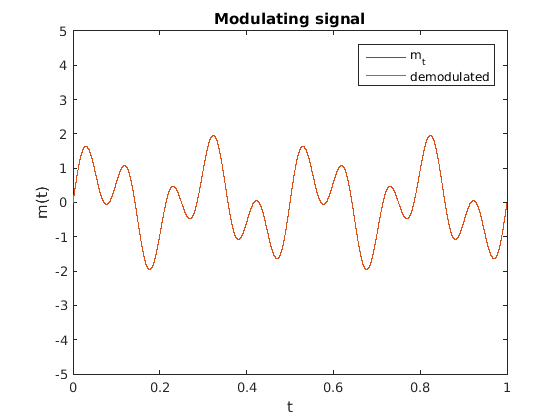

In [6]:
clc;clear all;close all;
%% Parâmetros da onda
fc = 6000;                                              % Frequência da portadora
fm = 10;                                                % Frequência do sinal
Am = 1;                                                 % Amplitude do sinal 
Theta = pi/4;                                           % Fase do sinal
Beta = pi/5;                                            % Fase da portadora
Fs = 8*fc;                                              % Frequência de amostragem
duration = 0.5;                                         % Tempo final
t = 0:1/Fs:1-1/Fs;                                      % Eixo do tempo
 
m_t = Am*sin(2*pi*fm*t)+Am*sin(2*pi*0.4*fm*t);                                % Sinal em banda base
kf=160*pi;                                              % Sensibilidade de frequencia 
m_intg=kf*1/Fs*cumsum(m_t);                             % Somatório com Kf
x = cos(2*pi*fc*t +m_intg );                            % Sinal modulado

%% Hilbert
z= hilbert(x);                                          % Forma analítica (real + imaginario)
inst_phase = unwrap(angle(z));                          % Fase instantânea com ajuste para variaçoes bruscas de angulo
p = polyfit(t,inst_phase,1);                            % Ajustar linearmente a fase instantânea
% Reavaliar o termo de compensação usando os valores ajustados
estimated = polyval(p,t);                               
demodulated = inst_phase - estimated;
demodulated=diff([demodulated(1) demodulated])/(1/Fs*kf);
%% plotting
plot(t,m_t,t,demodulated) 
axis([0 1 -5 5])
title('Modulating signal'); xlabel('t'); ylabel('m(t)')
legend('m_t','demodulated')